#  Day 11: Regularization Techniques in Machine Learning
In this notebook, we explore **regularization techniques** that help prevent overfitting and improve model generalization.

We’ll cover:
- L1 Regularization (Lasso)
- L2 Regularization (Ridge)
- Elastic Net
- How regularization affects model performance and feature weights
- Hyperparameter tuning for regularization strength

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression  # removed load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



## Load Dataset
We'll use a synthetic regression dataset for demonstration.

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=20, noise=10, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((160, 20), (40, 20))

## Baseline: Linear Regression (No Regularization)
Let's start with a plain linear regression model.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred = lin_reg.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 107.76833164199533
R²: 0.9954215490763593


## Ridge Regression (L2)
Penalizes large coefficients by squaring them, helping to reduce variance.

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))


MSE: 104.35797703542544
R²: 0.9955664352498806


## Lasso Regression (L1)
Encourages sparsity by driving some coefficients to zero, useful for feature selection.

In [11]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Train Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))


MSE: 106.2254023252071
R²: 0.9954870991878617


## Elastic Net (L1 + L2)
Combines Lasso and Ridge, balancing between sparsity and coefficient shrinkage.

In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Train Elastic Net model
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

# Predict on test set
y_pred_elastic = elastic.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred_elastic))
print("R²:", r2_score(y_test, y_pred_elastic))


MSE: 134.4601140665707
R²: 0.994287570160351


## Coefficient Comparison
Let's compare how coefficients shrink under different regularization methods.

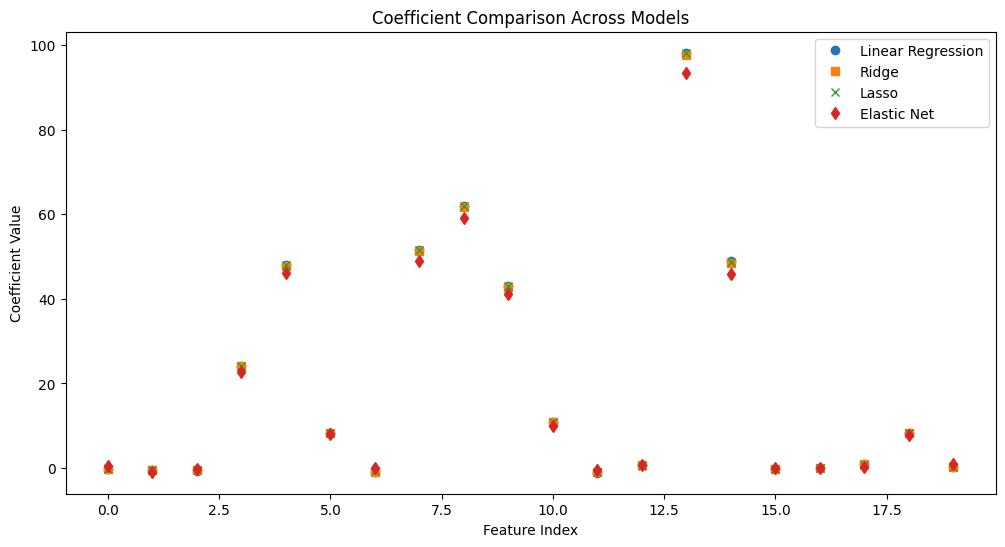

In [15]:
import matplotlib.pyplot as plt

# Plot coefficient comparison
plt.figure(figsize=(12,6))
plt.plot(lin_reg.coef_, 'o', label='Linear Regression')
plt.plot(ridge.coef_, 's', label='Ridge')
plt.plot(lasso.coef_, 'x', label='Lasso')
plt.plot(elastic.coef_, 'd', label='Elastic Net')
plt.legend()
plt.title("Coefficient Comparison Across Models")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()


## Hyperparameter Tuning with Cross-Validation
We can tune the alpha value using GridSearchCV.

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search with cross-validation
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

# Results
print("Best alpha:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best alpha: {'alpha': 0.1}
Best CV Score: 0.9946606452407633


## ✨ Key Takeaways
- **Ridge (L2)**: Shrinks coefficients, reduces variance.
- **Lasso (L1)**: Encourages sparsity, performs feature selection.
- **Elastic Net**: A balance between Ridge and Lasso.
- Regularization strength (`alpha`) is crucial — too high leads to underfitting, too low leads to overfitting.

Regularization improves generalization, especially in high-dimensional datasets.